In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from tqdm import tqdm
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter



In [6]:
df = pd.read_csv("Census 2019.csv",encoding='latin-1')

In [5]:
def trim(s):
    import re
    if s.startswith(' ') or s.endswith(' '):
        return re.sub(r"^(\s+)|(\s+)$", "", s)
    return s

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

states = df['State'].dropna().tolist()
states_clean = []
for item in states:
    try:
        states_clean.append(us_state_abbrev[trim(item)])
    except:
        pass
states_clean.append('WY') 

dic = {}
for key in states_clean:
    dic[key] = dic.get(key, 0) + 1

    
dic_1 = {'State': list(dic.keys()), 'Count':list(dic.values())}                      
df_state = pd.DataFrame.from_dict(dic_1)


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df_state,
    columns=['State', 'Count'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count of each State'
).add_to(m)

folium.LayerControl().add_to(m)
m



In [11]:
from pyecharts import Pie 

## gender

lst = df["Gender identity"].dropna().to_list()

for i in range(len(lst)):
    if lst[i] == 'Male/Man':
        lst[i] = "Male"
    elif lst[i] == "Female/Woman":
        lst[i] = "Female"
    else:
        lst[i] = "Other"


dic = {}
for key in lst:
    dic[key] = dic.get(key, 0) + 1
POSITION = list(dic.keys())
NUM = list(dic.values())

PIE = Pie("Gender", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],
        is_random= False,
        radius=[30, 70],
        is_legend_show= True,
        is_label_show = True,
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Gender.html')


In [56]:
## enrollment status
from pyecharts import Bar

lst = df["Employment status"].dropna().to_list()

dic = {'Other':0,'Not Applicable / Prefer not to state':0,'Retired':0,
       'Collecting SSDI/On disability benefits':0,'Unemployed, not seeking employment':0,'Unemployed, seeking employment':0,
       'Employed, seeking different employment':0,'Employed':0 }
for key in lst:
    dic[key] = dic.get(key, 0) + 1
POSITION = ['Other','not to state','Retired','Collecting SSDI','Not seeking employment','seeking employment','seeking different employment','Employed']
NUM = list(dic.values())

bar = Bar("Employment Status",title_pos='center')
bar.add(" ", POSITION,NUM,is_convert=True,mark_point=["max"],is_legend_show= False,yaxis_interval=10,yaxis_rotate=50)
bar.render('Employment.html')


In [61]:
## relationship status

lst = df["Relationship status"].dropna().to_list()



dic = {}
for key in lst:
    dic[key] = dic.get(key, 0) + 1
POSITION = list(dic.keys())
NUM = list(dic.values())

PIE = Pie("Relationship Status", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],
        radius=[10,70],
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        rosetype="area",
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Relationship.html')

In [64]:
 

## Children

lst = df["Have Children"].dropna().to_list()


dic = {}
for key in lst:
    dic[key] = dic.get(key, 0) + 1
POSITION = list(dic.keys())
NUM = list(dic.values())

PIE = Pie("Children", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],
        is_random= False,
        is_legend_show= True,
        is_label_show = True,
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Children.html')

In [43]:
## Topic Modeling
import spacy
import nltk
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

def word_Cloud_plot(tokenized_text,background):
    all_words = ' '.join([text for text in tokenized_text])
    wc = WordCloud(width=800,height = 500,random_state = 21,background_color=background, max_font_size = 100,max_words=50,
                    stopwords=STOPWORDS,contour_width=3, contour_color='steelblue')
    wc.generate(all_words)
    plt.figure(figsize = (10,7))
    plt.imshow(wc,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

def word_Hist(tokenized_text):
    a = nltk.FreqDist(tokenized_text)
    d = pd.DataFrame({"Wordtag": list(a.keys()),"Count": list(a.values())})
    d = d.nlargest(columns = "Count", n = 10)
    plt.figure(figsize = (10,5))
    ax = sns.barplot(data = d, x = "Wordtag", y = 'Count')
    ax.set(ylabel = 'Count')
    plt.show()
    
def get_Topic(text_data,NUM_TOPICS,topic_words):
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=topic_words)
    for topic in topics:
        print(topic)


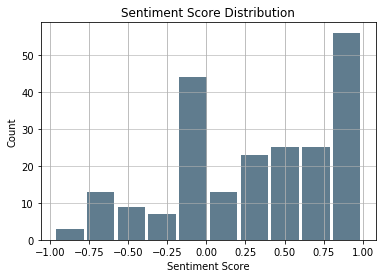

In [15]:
def get_Sentiment(df,name):  
    sid = SentimentIntensityAnalyzer()
    df['sentiment_nltk'] = [sid.polarity_scores(i).get('compound') for i in df[name]]
    lst = []
    for i in range(len(df['sentiment_nltk'])):
        if df['sentiment_nltk'][i] > 0.3:
            lst.append('Positive')
        elif df['sentiment_nltk'][i]< -0.3:
            lst.append('Negative')
        else:
            lst.append('Neutral')
    df['sentiment'] = lst

df_text = df[["End"]].dropna().reset_index()
get_Sentiment(df_text,'End')

data = df_text['sentiment_nltk']

data.plot.hist(grid=True, bins= 10, rwidth=0.9,color='#607c8e')

plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()



In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora

In [16]:
df_text.head()

,index,End,sentiment_nltk,sentiment
0,6,Staunch advocate to get more student veterans ...,0.4522,Positive
1,12,I was a founding member and am currently servi...,0.0000,Neutral
2,20,I was a helicopter pilot in the Marine Corps a...,0.8547,Positive
3,21,Going back to school after serving can be extr...,0.6962,Positive
4,32,My experience in the military allowed me to wo...,0.4404,Positive


In [20]:
lst = df_text["sentiment"].dropna().to_list()

dic = {}
for key in lst:
    dic[key] = dic.get(key, 0) + 1
POSITION = list(dic.keys())
NUM = list(dic.values())

PIE = Pie("Sentiments", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],
        radius=[30,70],
        is_random= False,
        is_legend_show= True,
        is_label_show = True,
   
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('sentiment.html')

In [38]:
df_positive = df_text[df_text['sentiment'] == 'Positive'].reset_index()
df_negative = df_text[df_text['sentiment'] == 'Negative'].reset_index()



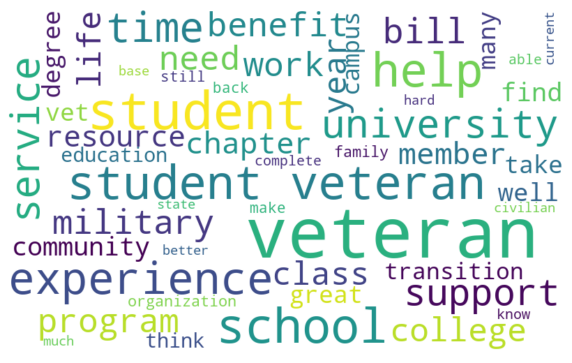

In [41]:
text_data = []
text = df_positive['End']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)
    
text_list = [j for sub in text_data for j in sub]

word_Cloud_plot(text_list,'white')

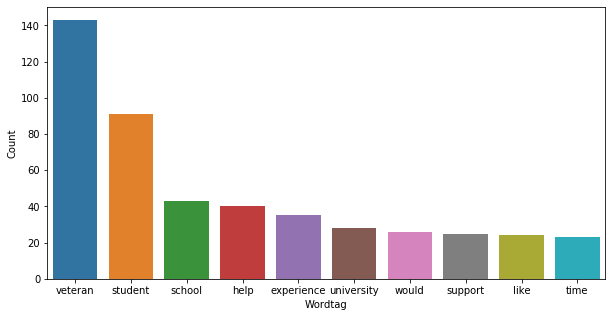

In [44]:
word_Hist(text_list)

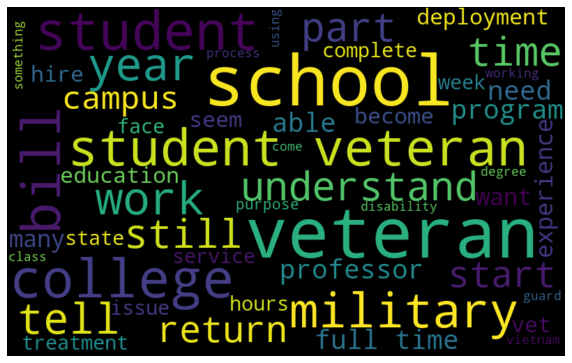

In [45]:
text_data = []
text = df_negative['End']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)
    
text_list = [j for sub in text_data for j in sub]

word_Cloud_plot(text_list,'black')

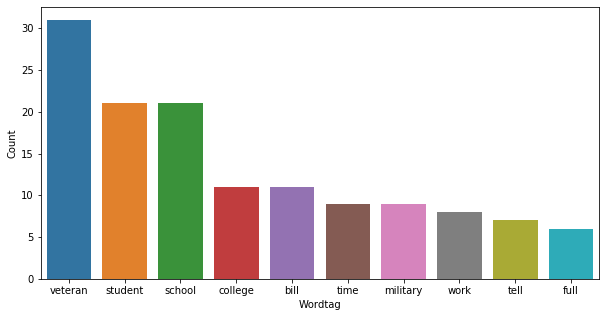

In [46]:
word_Hist(text_list)

In [2]:
get_Topic(text_data,7,15)

NameError: name 'get_Topic' is not defined

In [8]:
count = []
for i in range(len(df)):
    count.append(1)
    
df['Number of count'] = count

df.to_csv("census_2019_tableau.csv",index=False)

In [9]:
df.head()

,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Consent,Age,Relationship status,Ethnicity,...,Debt payments_3,Debt default,Debt burden,Withdraw rank,Withdraw progress,Withdraw reasons,Withdraw reasons_26_TEXT,Return likelihood,Return easier,Number of count
0,421,True,42.795105,-96.925797,email,EN,"Yes, I am over 18, want to participate, and ta...",23,Single / Never married,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,480,True,37.256699,-93.294403,email,EN,"Yes, I am over 18, want to participate, and ta...",53,Married,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,361,True,39.721802,-104.895103,email,EN,"Yes, I am over 18, want to participate, and ta...",54,Married,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,356,True,32.194305,-110.976700,email,EN,"Yes, I am over 18, want to participate, and ta...",51,Married,White/Caucasian,...,No,"No, never been in default",No burden at all,NaN,NaN,NaN,NaN,NaN,NaN,1
4,496,True,44.837708,-123.251205,email,EN,"Yes, I am over 18, want to participate, and ta...",35,Prefer not to say,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
lst = df["Branch"].dropna().to_list()

dic = {}
for key in lst:
    dic[key] = dic.get(key, 0) + 1
POSITION = list(dic.keys())
NUM = list(dic.values())

PIE = Pie("Branch", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],
        radius=[10,70],
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        rosetype="area",
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Branch.html')